In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUN4vMK\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUN4vMK\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUN4vMK\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'readr' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"
Warning message:
"package 'forcats' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpUN4vMK\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('Transformed_ionStats_leafstage_XYZ.csv',colClasses =c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(leaf_stage~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$leaf_stage)
model

[1] 0.5833333

Call:
lda(leaf_stage ~ ., data = train.data)

Prior probabilities of groups:
   1    2    3 
0.35 0.40 0.25 

Group means:
          B11       Na23          Mg26       Al27        P31           S34
1  0.05060135 0.20083233 -0.0002009285 -0.1240311 -0.1733459 -0.2316304996
2 -0.13611723 0.01761033  0.1543405478 -0.1037208  0.2582389 -0.0820835837
3 -0.17209017 0.07174370  0.0953553143  0.2135610  0.1300769  0.0001524108
         K39        Ca44       Fe54        Mn55        Co59        Ni60
1 -0.1642376 -0.12025810 -0.1757699  0.02483264  0.05501121  0.06790590
2  0.1682897 -0.17724525 -0.0104825 -0.02920705 -0.02840929  0.07810392
3 -0.1096391 -0.06454871  0.2841625 -0.12583495 -0.09430467 -0.10653439
          Cu63         Zn66        As75       Rb85        Sr88        Mo98
1 -0.001413502 -0.101711924 -0.10933563 0.19562261  0.01566258 -0.11769164
2  0.229121632 -0.086523985 -0.06103281 0.07067994 -0.12318861  0.05216818
3 -0.113310635 -0.007557171  0.23525197 0.01040958  0.08023727  

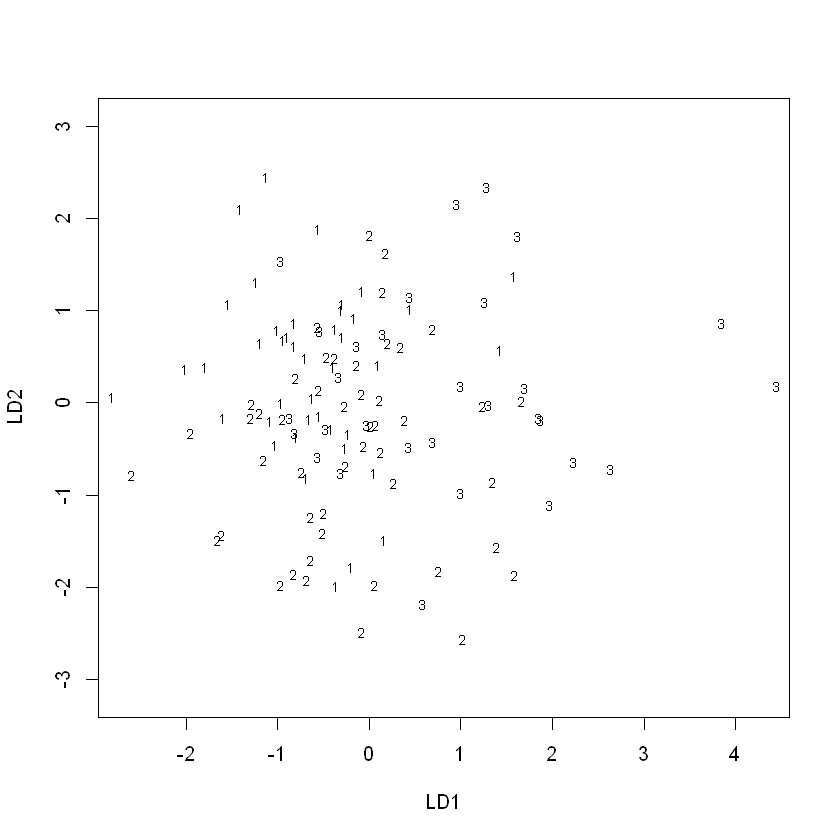

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 2 2 1 1 1
Levels: 1 2 3

,1,2,3
1,0.6166801,0.2973571,0.08596283
2,0.2349174,0.5812647,0.18381790
3,0.3142954,0.5419007,0.14380386
4,0.5882180,0.3175627,0.09421928
5,0.5380031,0.2991549,0.16284206
6,0.5461939,0.3458757,0.10793032


,LD1,LD2
1,-0.8070166,0.7578413
2,0.1491968,-0.7175402
3,-0.1717105,-0.4433280
